# Homework 01

### Brown University  
### DATA 1010  
### Fall 2020

In [1]:
using Plots, Images, ImageMagick, CSV
default(legend = false)

## Problem 1

The **rank** of a matrix is defined to be the dimension of the span of its columns. 

(a) Show that the rank of $\mathbf{u} \mathbf{v}'$ is equal to 1, if $\mathbf{u}$ and $\mathbf{v}$ are any (column) vectors. 

(b) Identify some countries whose flags are rank-1 matrices (where the correspondence between flags and matrices is to associate a flag image with a matrix of pixel values). You can have a look at various flags in the `flags` directory 

(c) Run the code below several times to see a handful of rank-1 matrix heatmaps. Describe qualitatively what random rank-1 matrices look like.

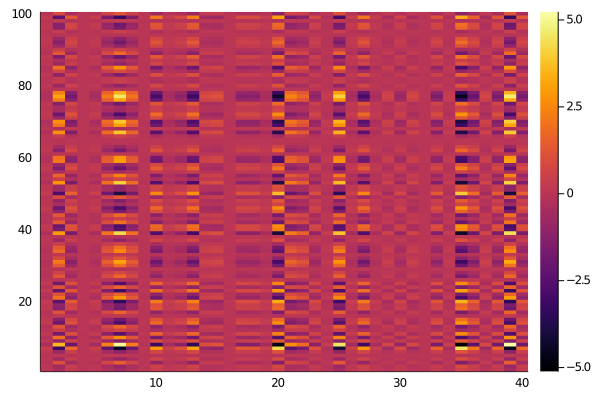

In [2]:
heatmap(randn(100) * randn(40)')

(d) Does the matrix $A$ defined below look like a rank-1 matrix? Is it a rank-1 matrix?

In [3]:
A = randn(100) * randn(40)' + 0.001*randn(100, 40);

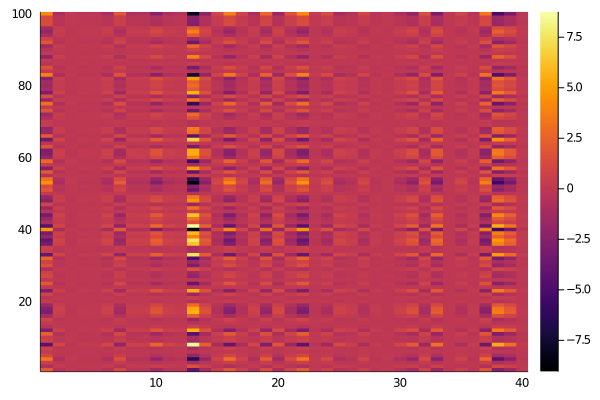

In [4]:
heatmap(A)

(e) Suppose we just had the matrix $A$, but not the expression that was used to generate it. How could we recover the information that this matrix is very close to a rank-1 matrix?

(f) What is the distribution of country flag image ranks? For consistency, we divide each rank value by the height of the matrix (the first dimension). Make a histogram of the resulting ratios. Which flag elements lead to an especially high rank?

*Note: you should expect this computation to take a very long time to run. Also, every cell in the rest of this problem statement is there to help you; there are no further prompts.*

In [5]:
"""
Compute the rank of the flag of the country with code `countrycode`, interpreting 
each RGB triple as a 3×1 matrix block.
"""
function flagrankratio(countrycode)
    img = RGBA{Normed{UInt8,8}}.(ImageMagick.load("flags/$(countrycode).png"))
    height, width = size(channelview(img))[2:3]
    rank(reshape(channelview(img), (4 * height, width))) / size(img, 1)
end

flagrankratio

For example, the rank of the US flag image: 

In [6]:
flagrankratio("us")

0.06978470675575353

If we want to take a look at a particular flag, we can just load it:

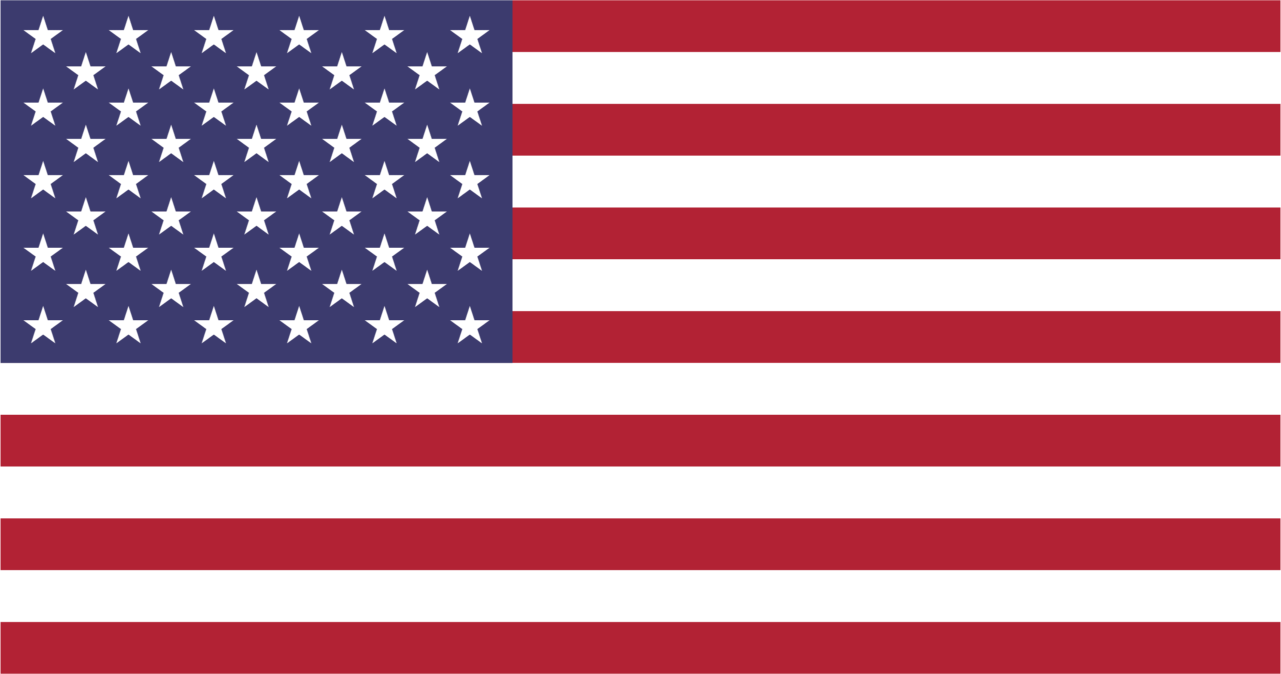

In [7]:
ImageMagick.load("flags/us.png")

## Problem 2

Show that if $\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$ is linearly
independent and
$\{\mathbf{v}_1 + \mathbf{w}, \mathbf{v}_2 \ldots, \mathbf{v}_n\}$ is
linearly dependent, then $\mathbf{w}$ is in the span of
$\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$.

## Problem 3

Suppose that $A$ is a square matrix each of whose rows has the same sum $s$. Show that $s$ is an eigenvalue of $A$. Hint: don't use determinants; leverage the constant row sum to search for an eigenvector directly. 

Note: as an example, the matrix 
$$
A = \left[ \begin{array}{ccc} 
2 & -2 & 4 \\
1 & 1 & 2 \\
0 & 3 & 1
\end{array}\right] 
$$
has a constant row sum of 4. 

## Problem 4

Consider the function $f(x,y) = xe^{-x^2 + y} + \log\left(\frac{x}{1+ y}\right)$. 

(a) Find $\nabla f$.

(b) Numerically identify $f$'s direction of maximum increase at the point $(1,0)$ by evaluating $f([1,0] + \epsilon[\cos(\theta), \sin(\theta)])$ for some small value of $\epsilon$ for many equally-spaced $\theta$ values in the range $[0, 2\pi)$ and identifying the ones that produce the largest and smallest output values. 

Hints: You want to make a plot showing the relationship between $\theta$ and the resulting value output by the function. Comment on the shape of the resulting graph; is the shape universal or idiosyncratic to this function? You also want to also investigate a few values of $\epsilon$, to eludicate its role in the problem.

(c) Discuss the relationship between parts (a) and (b).

## Problem 5

*In this problem, we will explore an important multivariable calculus idea which was not emphasized in the multivariable calculus review day.*

The map below was obtained by placing one dot at the residence of each person in the contiguous United States in the 2010 US Census (with color indicating race identification) and then representing each of many small squares in a grid with the average of the colors of the dots in the square. 

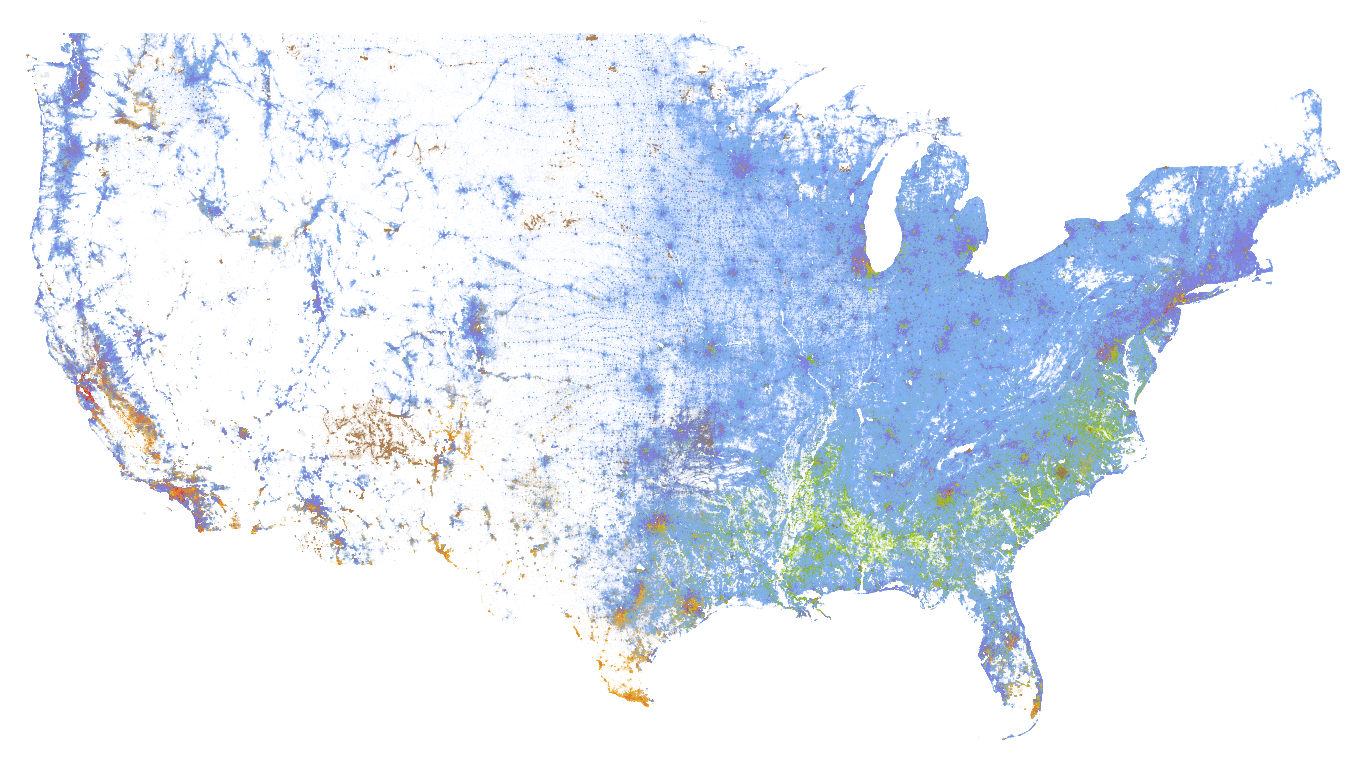

Suppose you're given the $764 \times 1366$ matrix which represent how darkly colored in each little square is (see the figure to the right for a small piece of this grid). These numbers are roughly proportional to the number of people living in each square. Here's a zoomed-in view of this matrix:

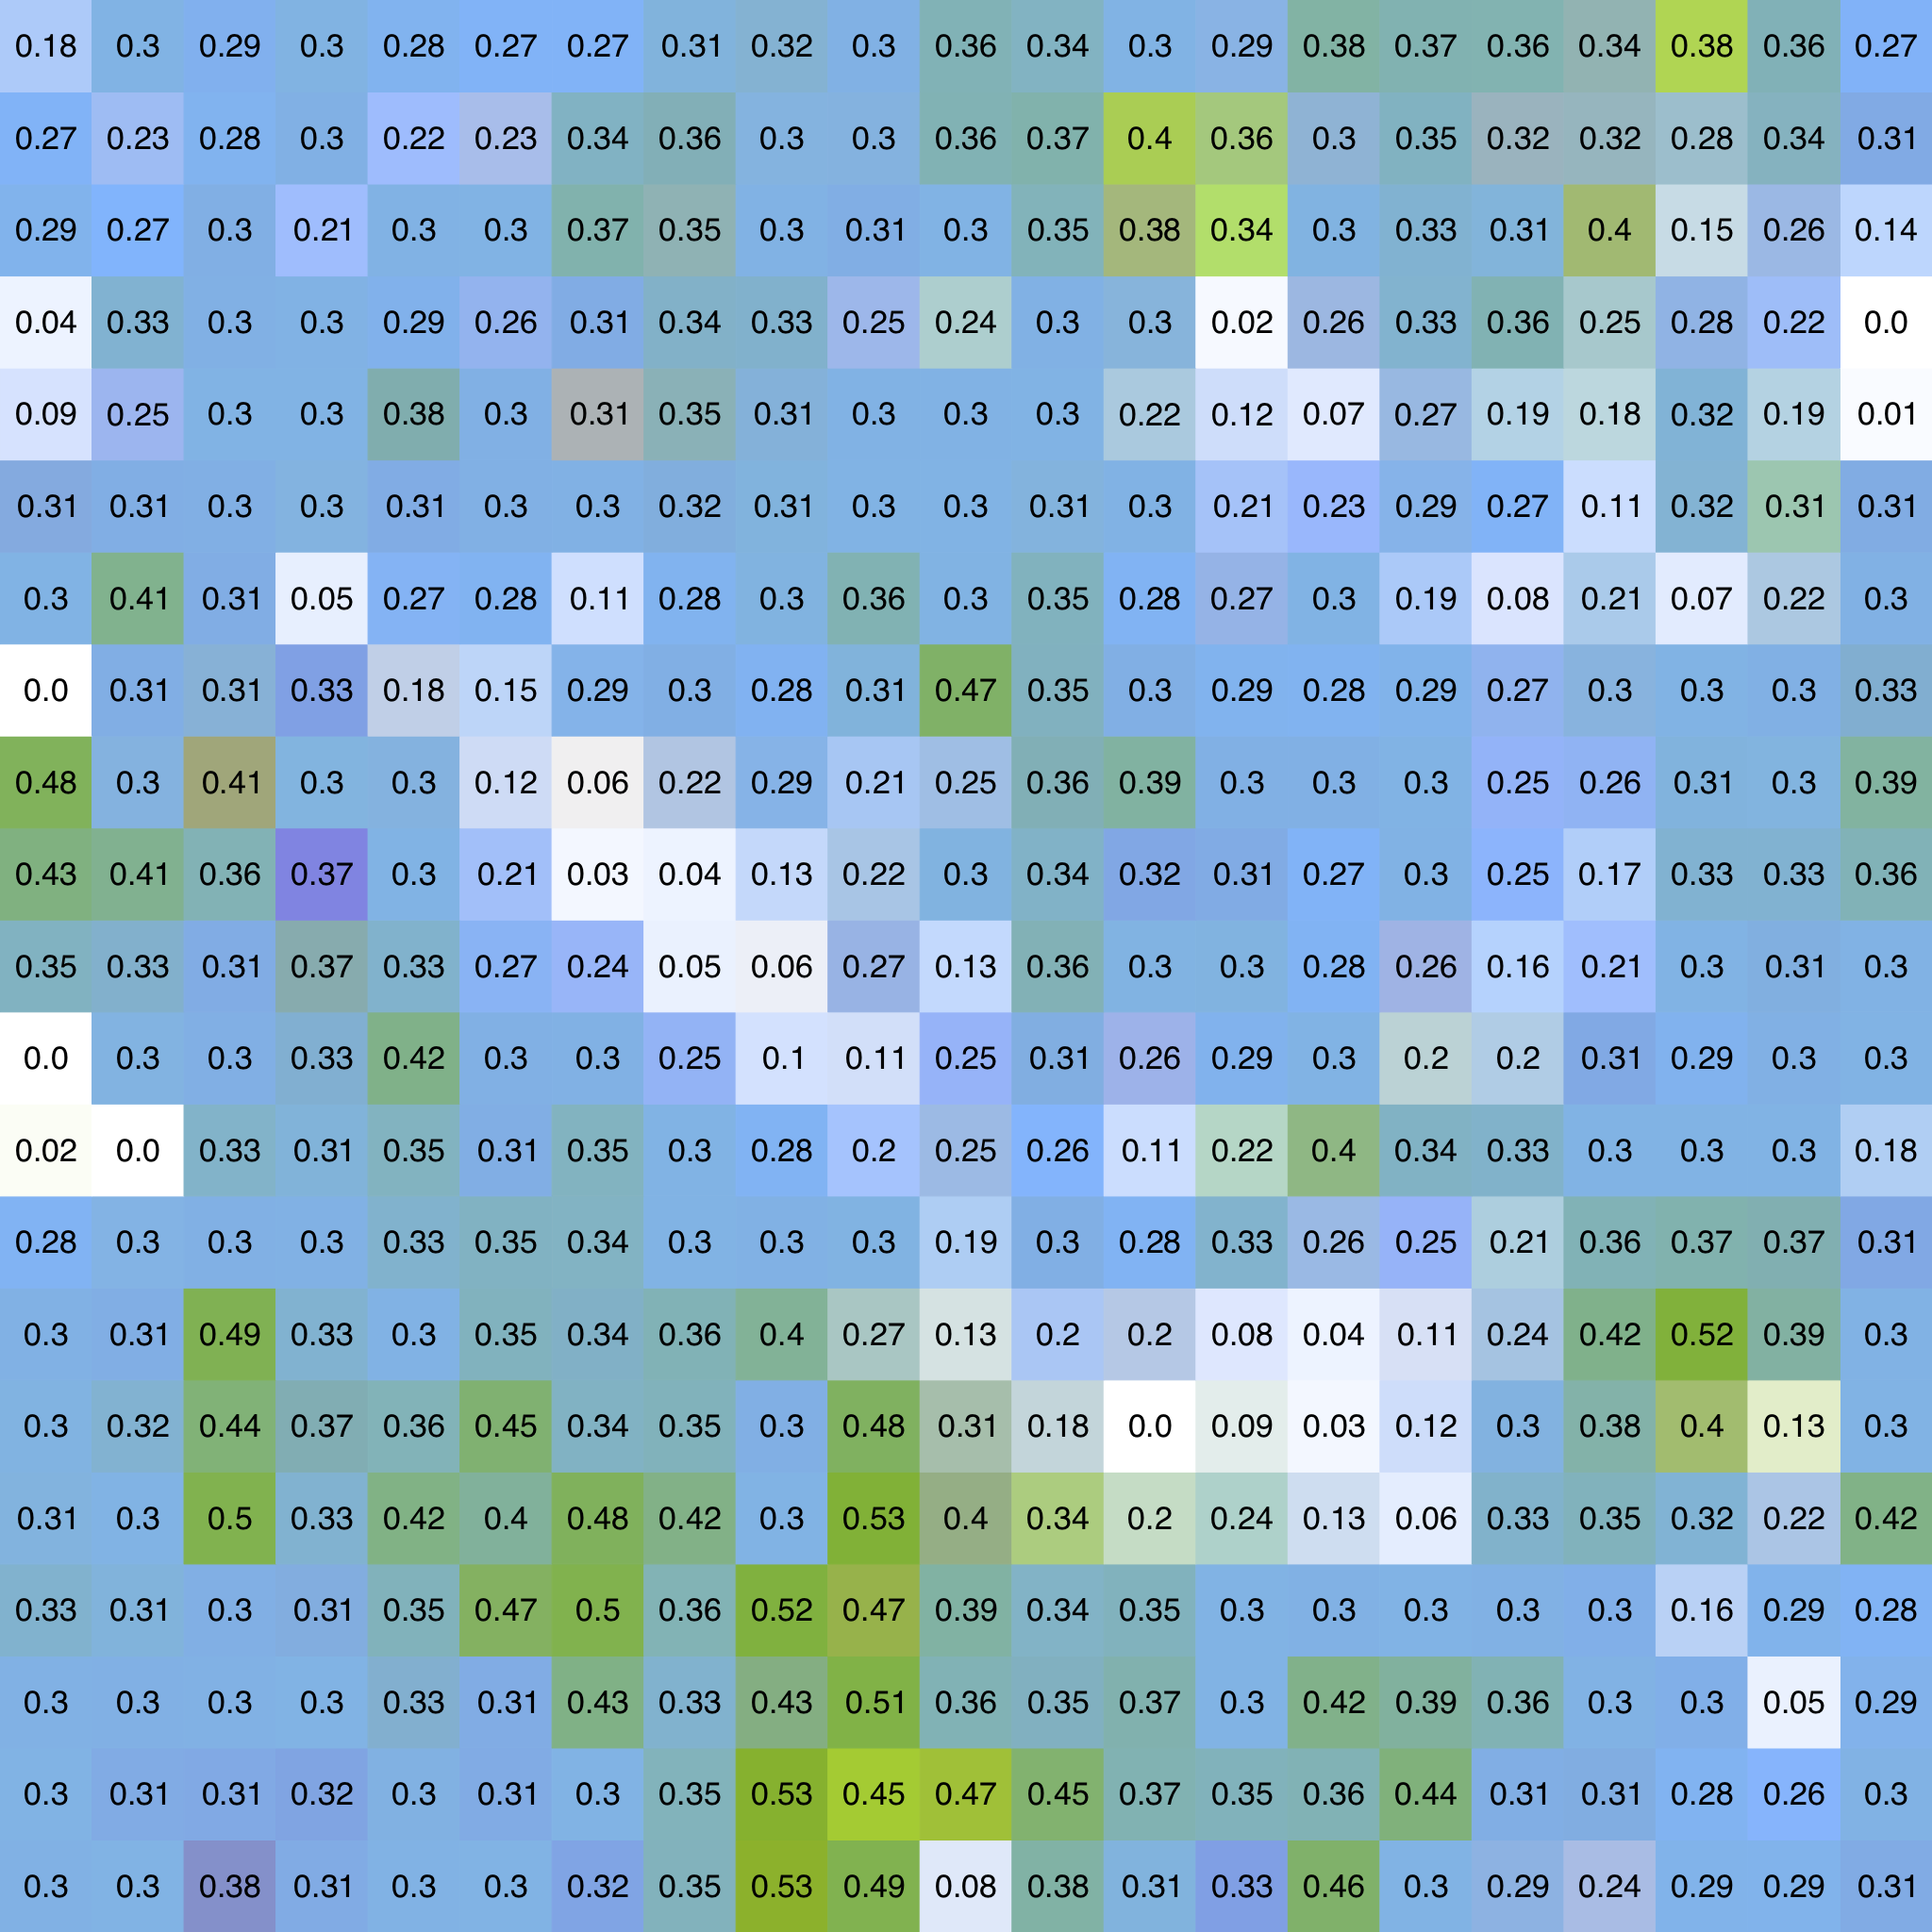

Using these data, approximate the population-weighted center of mass of the contiguous United States. Feel free to answer in terms of the matrix dimensions (e.g., how many pixels down and how many to the right of the top left corner of the matrix).

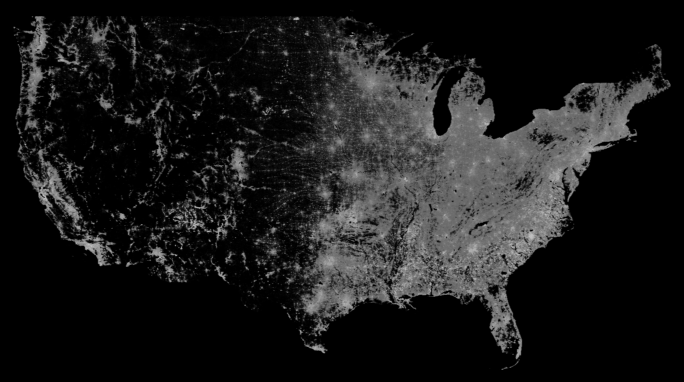

In [8]:
pixeldensities = Matrix(CSV.read("US_Matrix.csv"))
Gray.(pixeldensities)